In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("saleadvertisising.csv")

In [3]:
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.drop("Unnamed: 0",axis = 1,inplace=True)

In [5]:
df.head()

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.isnull().sum()

TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

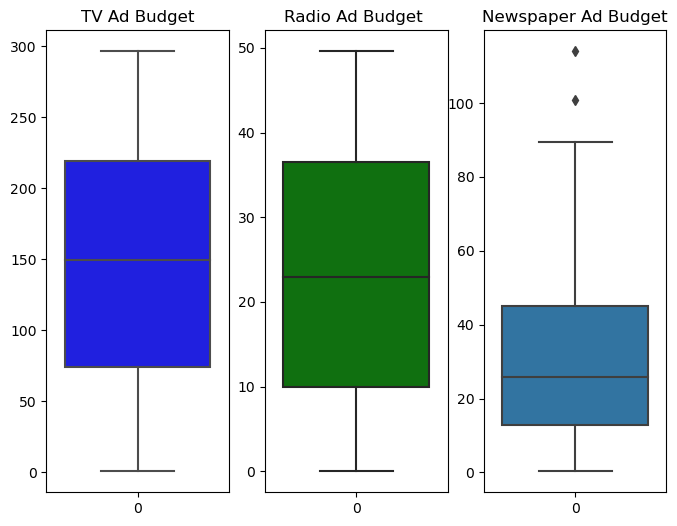

In [7]:
plt.figure(figsize=(8,6))
plt.subplot(1,3,1)
plt.title("TV Ad Budget")
sns.boxplot(df["TV Ad Budget ($)"],color='b')
plt.subplot(1,3,2)
plt.title("Radio Ad Budget ")
sns.boxplot(df["Radio Ad Budget ($)"],color='g')
plt.subplot(1,3,3)
plt.title("Newspaper Ad Budget")
sns.boxplot(df["Newspaper Ad Budget ($)"])
plt.show()

In [8]:
df.corr()#cheching the corr. with radio and sales
#TV = 0.7, Radio =0.57,newspaper=0.22
#sales?

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
TV Ad Budget ($),1.000000,0.054809,0.056648,0.782224
Radio Ad Budget ($),0.054809,1.000000,0.354104,0.576223
Newspaper Ad Budget ($),0.056648,0.354104,1.000000,0.228299
Sales ($),0.782224,0.576223,0.228299,1.000000


In [9]:
#Model Training
#Train and Test :80%, and 20% respectively
df.shape

(200, 4)

In [10]:
x=df.drop(columns='Sales ($)',axis=1)#except sales other columns are present in X
y=df["Sales ($)"]#only Sales present in y

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [12]:
x_train #80% of the training data

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($)
134,36.9,38.6,65.6
66,31.5,24.6,2.2
26,142.9,29.3,12.6
113,209.6,20.6,10.7
168,215.4,23.6,57.6
...,...,...,...
67,139.3,14.5,10.2
192,17.2,4.1,31.6
117,76.4,0.8,14.8
47,239.9,41.5,18.5


In [13]:
y_train #80% of the training data

134    10.8
66      9.5
26     15.0
113    15.9
168    17.1
       ... 
67     13.4
192     5.9
117     9.4
47     23.2
172     7.6
Name: Sales ($), Length: 160, dtype: float64

In [14]:
x_test #20% of the test data

,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($)
18,69.2,20.5,18.3
170,50.0,11.6,18.4
107,90.4,0.3,23.2
98,289.7,42.3,51.2
177,170.2,7.8,35.2
182,56.2,5.7,29.7
5,8.7,48.9,75.0
146,240.1,7.3,8.7
12,23.8,35.1,65.9
152,197.6,23.3,14.2


In [15]:
y_test #20% of the test data

18     11.3
170     8.4
107     8.7
98     25.4
177    11.7
182     8.7
5       7.2
146    13.2
12      9.2
152    16.6
61     24.2
125    10.6
180    10.5
154    15.6
80     11.8
7      13.2
33     17.4
130     1.6
37     14.7
74     17.0
183    26.2
145    10.3
45     14.9
159    12.9
60      8.1
123    15.2
179    12.6
185    22.6
122    11.6
44      8.5
16     12.5
55     23.7
150    16.1
111    21.8
22      5.6
189     6.7
129     9.7
4      12.9
83     13.6
106     7.2
Name: Sales ($), dtype: float64

In [16]:
#x_train, y_train
#x_test-testing x_test will give ycap values as output
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)#training

LinearRegression()

In [17]:
#m1,m2,m3 values
lr.coef_

array([ 0.04458402,  0.19649703, -0.00278146])

In [18]:
lr.intercept_# c_value

2.9948930304953265

In [19]:
#Evaluation
ycap=lr.predict(x_test)

In [20]:
list(y_test)

[11.3,
 8.4,
 8.7,
 25.4,
 11.7,
 8.7,
 7.2,
 13.2,
 9.2,
 16.6,
 24.2,
 10.6,
 10.5,
 15.6,
 11.8,
 13.2,
 17.4,
 1.6,
 14.7,
 17.0,
 26.2,
 10.3,
 14.9,
 12.9,
 8.1,
 15.2,
 12.6,
 22.6,
 11.6,
 8.5,
 12.5,
 23.7,
 16.1,
 21.8,
 5.6,
 6.7,
 9.7,
 12.9,
 13.6,
 7.2]

In [21]:
# metric to determine the performance
from sklearn import metrics

In [22]:
mse=metrics.mean_squared_error(y_test,ycap)# error is interpretable since the dataset is small

In [23]:
#RMSE # to improve cros validation, hyper parameter, feature selection, gradient Descent
np.sqrt(mse)

2.0981225634956795

In [24]:
import pickle #creating a pickle file
with open('lr.pkl', 'wb') as file:
    pickle.dump(lr,file)

In [25]:
#wb - write binary
#lr - linear regression object


In [26]:
#r2 score
r2=metrics.r2_score(y_test,ycap)

In [27]:
r2

0.8601145185017869

In [28]:
a = (1-r2)*(200-1)

In [29]:
b=200-3-1

In [30]:
adjusted_r2 = 1-(a/b)

In [31]:
adjusted_r2

0.8579734141931408